In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy
from cvxpy import *
% matplotlib inline

In [0]:
## ANS 1.a Hard margin SVM

In [0]:
# function for hard margin
import cvxpy as cp
def hard_margin_SVM(X,Y):
    #print(X.shape())
    n=2
    w = cp.Variable(n)
    #print(X@beta)
    b = cp.Variable()
    loss = cp.sum_entries(cp.pos(1 - cp.mul_elemwise(Y, X*w + b)))
    #reg = norm(beta, 1)
    #lambd = Parameter(nonneg=True)
    prob = Problem(Minimize(loss))# + lambd*reg))
    prob.solve()
    print(w.value,b.value)
    return w,b

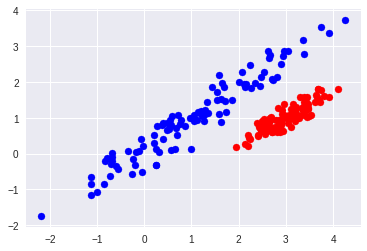

In [5]:
# Define the two sets 
d = 2   # Dimension of problem. We'll leave at 2 for now.
m = 100 # Number of points in each class
n = 100  

x_center = [1,1]  # E.g. [1,1]
y_center = [3,1]  # E.g. [2,2]
#x1,x2,x3 = []

# Set a seed which will generate feasibly separable sets
#  Note: these may only be separable with the default tutorial settings
np.random.seed(8)  

# Define random orientations for the two clusters
orientation_x = np.random.rand(2,2)
orientation_y = np.random.rand(2,2)
#print(orientation_x.shape)

# Generate unit-normal elements, but clip outliers.
rx = np.clip(np.random.randn(m,d),-2,2)
#print(rx.shape)
ry = np.clip(np.random.randn(n,d),-2,2)
#print(ry.shape)
x = x_center + np.dot(rx,orientation_x)
#print(x.shape)
y = y_center + np.dot(ry,orientation_y)
#print(y)
#print(y[:,1])
x11,x12,x13 = [3.5,6.5],[3.5,7],[3.5,6.75]
y11,y12,y13 = [1.20,.20],[1.5,.25],[1.35,.225]
# Check out our clusters!
plt.scatter(x[:,0],x[:,1],color='blue')
plt.scatter(y[:,0],y[:,1],color='red')

In [0]:
## Define a helper function for plotting the results, the decision plane, and the supporting planes

def plotClusters(x,y,a,b,t):
    # Takes in a set of datapoints x and y for two clusters,
    #  the hyperplane separating them in the form a'x -b = 0,
    #  and a slab half-width t
   # print(type(x[:,0]), y[:,0])
    d1_min = np.min([x[:,0],y[:,0]])
   # print(d1_min)
    d1_max = np.max([x[:,0],y[:,0]])
    #print(d1_max)
    # Line form: (-a[0] * x - b ) / a[1]
    d2_atD1min = (-a[0]*d1_min + b ) / a[1]
    #print(d2_atD1min)
    d2_atD1max = (-a[0]*d1_max + b ) / a[1]
    #print(d2_atD1max)
    
    sup_up_atD1min = (-a[0]*d1_min + b + t ) / a[1]
    sup_up_atD1max = (-a[0]*d1_max + b + t ) / a[1]
    sup_dn_atD1min = (-a[0]*d1_min + b - t ) / a[1]
    sup_dn_atD1max = (-a[0]*d1_max + b - t ) / a[1]

    # Plot the clusters!
    plt.scatter(x[:,0],x[:,1],color='blue')
    plt.scatter(y[:,0],y[:,1],color='red')
    plt.plot([d1_min,d1_max],[d2_atD1min,d2_atD1max],color='black')
    plt.plot([d1_min,d1_max],[sup_up_atD1min,sup_up_atD1max],'--',color='gray')
    plt.plot([d1_min,d1_max],[sup_dn_atD1min,sup_dn_atD1max],'--',color='gray')
    plt.ylim([np.floor(np.min([x[:,1],y[:,1]])),np.ceil(np.max([x[:,1],y[:,1]]))])

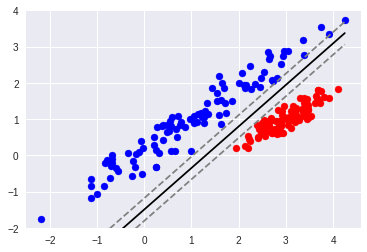

In [7]:
## OPTIMIZATION- in CvxPy!

a = Variable(d)
b = Variable()
u = Variable(m)
v = Variable(n)

obj = Minimize(np.ones(m)*u + np.ones(n)*v)

#print(x)
x_constraints = [a.T * x[i] - b >= 1 - u[i]  for i in range(m)]
y_constraints = [a.T * y[i] - b <= -1 + v[i] for i in range(n)]
u_constraints = [u[i] >= 0  for i in range(m)]
v_constraints = [v[i] >= 0  for i in range(n)]

constraints = x_constraints +  y_constraints + u_constraints + v_constraints
#print(constraints[0])

prob = Problem(obj, constraints)

prob.solve()
#print("Problem Status: %s"%prob.status)
#print(type(y), len(y))
#print(y)
plotClusters(x,y,a.value,b.value,1)

In [0]:
## (2) Using iris dataset

In [0]:
import pandas as pd
data = pd.read_csv('Iris.csv')

In [13]:
data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
data = data.drop(['sepal_width','petal_length'], axis=1)
data.tail()

,sepal_length,petal_width,species
145,6.7,2.3,virginica
146,6.3,1.9,virginica
147,6.5,2.0,virginica
148,6.2,2.3,virginica
149,5.9,1.8,virginica


In [15]:
data['species'] =  data['species'].map({'setosa': 'setosa', 'virginica': 'non-setosa', 'versicolor': 'non-setosa'})
data.head()

,sepal_length,petal_width,species
0,5.1,0.2,setosa
1,4.9,0.2,setosa
2,4.7,0.2,setosa
3,4.6,0.2,setosa
4,5.0,0.2,setosa


<class 'list'>


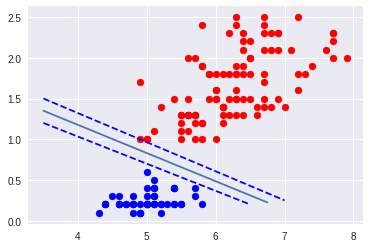

In [16]:
X = list(data.values[:, :2])
Y = list(data.values[:, 2])
print(type(X))
x=[]
y=[]
for i,j in zip(X,Y):
    if j == 'setosa':
        x.append(list(i))
    else:
        y.append(list(i))
    
x1 = [item[0] for item in x]
x2 = [item[1] for item in x]
y1 = [item[0] for item in y]
y2 = [item[1] for item in y]
plt.scatter(x1 ,x2,color='blue')
plt.scatter(y1,y2,color='red')

plt.plot(x11,y11,'b--')
plt.plot(x12,y12,'b--')
plt.plot(x13,y13)
plt.show()

In [0]:
def plotClusters(x,y,a,b,t):
    # Takes in a set of datapoints x and y for two clusters,
    #  the hyperplane separating them in the form a'x -b = 0,
    #  and a slab half-width t
    x1 = [item[0] for item in x]
    x1 = np.asarray(x1)
    x2 = [item[1] for item in x]
    x2 = np.asarray(x2)
    y1 = [item[0] for item in y]
    y1 = np.asarray(y1)
    #print(y1[:50].shape)
    y2 = [item[1] for item in y]
    y2 = np.asarray(y2)
    d1_min = np.min([x1,y1[:50]])
    #print(d1_min)
    d1_max = np.max([x1,y1[:50]])
    #print(d1_max)
    # Line form: (-a[0] * x - b ) / a[1]
    d2_atD1min = (-a[0]*d1_min + b ) / a[1]
    #print(d2_atD1min)
    d2_atD1max = (-a[0]*d1_max + b ) / a[1]
    #print(d2_atD1max)
    
    sup_up_atD1min = (-a[0]*d1_min + b + t ) / a[1]
    sup_up_atD1max = (-a[0]*d1_max + b + t ) / a[1]
    sup_dn_atD1min = (-a[0]*d1_min + b - t ) / a[1]
    sup_dn_atD1max = (-a[0]*d1_max + b - t ) / a[1]
    print(d1_min, d1_max, sup_up_atD1min, sup_up_atD1max)
    print(d1_min, d1_max, sup_dn_atD1min, sup_dn_atD1max)

    # Plot the clusters!
    plt.scatter(x1,x2,color='blue')
    plt.scatter(y1,y2,color='red')
    plt.plot([d1_min,d1_max],[d2_atD1min,d2_atD1max],color='black')
    plt.plot([d1_min,d1_max],[sup_up_atD1min,sup_up_atD1max],'--',color='gray')
    plt.plot([d1_min,d1_max],[sup_dn_atD1min,sup_dn_atD1max],'--',color='gray')
    #plt.plot(d1_min,sup_dn_atD1min, 'g*')
    plt.ylim([np.floor(np.min([x2,y2[:50]])),np.ceil(np.max([x2,y2[:50]]))])

Problem Status: optimal
4.3 7.0 0.6127554759582713 0.8063209823985066
4.3 7.0 0.8686427162905958 1.062208222730831


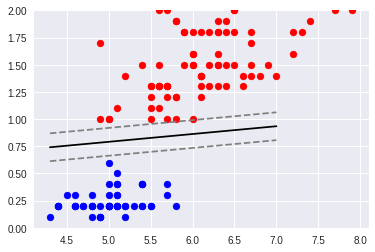

In [18]:
## OPTIMIZATION- in CvxPy!
m = 50
n = 100
d = 2
a = Variable(d)
b = Variable()
u = Variable(m)
v = Variable(n)

obj = Minimize(np.ones(m)*u + np.ones(n)*v)


x_constraints = [a.T * x[i] - b >= 1 - u[i]  for i in range(m)]
y_constraints = [a.T * y[i] - b <= -1 + v[i] for i in range(n)]
u_constraints = [u[i] >= 0  for i in range(m)]
v_constraints = [v[i] >= 0  for i in range(n)]

constraints = x_constraints +  y_constraints + u_constraints + v_constraints
#print(constraints[1])

prob = Problem(obj, constraints)

prob.solve()
print("Problem Status: %s"%prob.status)

#print(a.value)
plotClusters(x,y,a.value,b.value,1)


In [0]:
### 3 ploating the dual

In [20]:
print("x constraints dual variable", constraints[0].dual_value)
print("y constraints dual variable", constraints[1].dual_value)
print("u constraints dual variable", constraints[2].dual_value)
print("v constraints dual variable", constraints[3].dual_value)

x constraints dual variable 0.0
y constraints dual variable 0.0
u constraints dual variable 0.0
v constraints dual variable 3.3900537461848803e-18


#### Examples with larger dual values have large importance in deciding the boundary

In [0]:
# ANS 3

In [22]:
print(data.head())
df = data
val = df['species'].values
f = []
for v in val:
  if v == 'setosa':
    f.append(1)
  else:
    f.append(-1)
df['species'] = f

   sepal_length  petal_width species
0           5.1          0.2  setosa
1           4.9          0.2  setosa
2           4.7          0.2  setosa
3           4.6          0.2  setosa
4           5.0          0.2  setosa


<class 'list'>


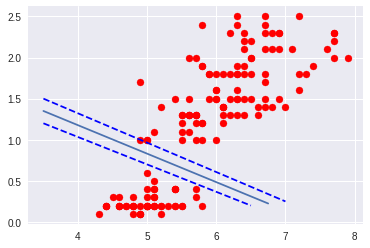

In [23]:
X = list(data.values[:, :2])
Y = list(data.values[:, 2])
print(type(X))
x=[]
y=[]
for i,j in zip(X,Y):
    if j == 'setosa':
        x.append(list(i))
    else:
        y.append(list(i))
    
x1 = [item[0] for item in x]
x2 = [item[1] for item in x]
y1 = [item[0] for item in y]
y2 = [item[1] for item in y]
plt.scatter(x1 ,x2,color='blue')
plt.scatter(y1,y2,color='red')

plt.plot(x11,y11,'b--')
plt.plot(x12,y12,'b--')
plt.plot(x13,y13)
plt.show()

## ANS 4

In [24]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
X = np.asarray(X)
Y = np.asarray(Y)
model.fit(X, Y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        #ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, c='blue', linewidth=1, facecolors='none');
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1], s=300, marker=r'$\odot$', facecolors='none', edgecolors='black')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


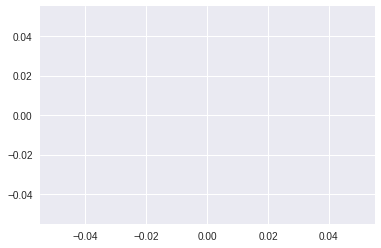

In [26]:
data['species'] = data['species'].map({'setosa': 1, 'non-setosa': 0})
Y = data['species']
#print(Y)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [27]:
model.support_vectors_

array([[4.9, 1. ],
       [6. , 1. ],
       [5. , 0.6]])

In [0]:
X = model.support_vectors_[:, 0]
y = model.support_vectors_[:, 1]

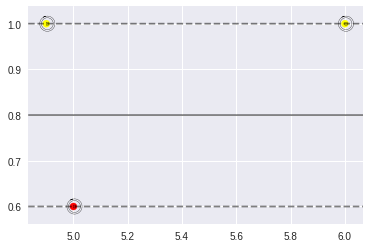

In [29]:
plt.scatter(X, y, c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

## ANS 5

If Non-Support Vectors are thrown away that does not make a difference because,ideally alpha is zero for them, and hence do not contribute to decision boundary

In [0]:
# ANS 2

In [0]:
# loading the dataset
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target
y_o = []
for i in Y:
  if i == 0:
    y_o.append(1)
  else:
    y_o.append(i)
Y = np.array(y_o)   

In [0]:
Y = Y.reshape(-1,1)

In [0]:
X_train = X[:120]
X_test = X[120:]
Y_train = Y[:120]
Y_test = Y[120:]

In [0]:
from __future__ import division
import numpy as np
np.random.seed(1)
n = 2
m = 150
TEST = m
DENSITY = 0.2
beta_true = np.random.randn(n,1)
dx1,dx2,dx3 = [5.4,5.9],[4.9,5.4],[5.15,5.65]
dy1,dy2,dy3 = [2,5.5],[2,5.5],[2,5.5]
idxs = np.random.choice(range(n), int((1-DENSITY)*n), replace=False)
for idx in idxs:
    beta_true[idx] = 0
offset = 0
sigma = 45
Y = np.sign(X.dot(beta_true) + offset + np.random.normal(0,sigma,size=(150,1)))

In [0]:
import cvxpy as cv
beta = cv.Variable((2,1))
v = cv.Variable()
loss = cv.sum(cv.pos(1 - cv.multiply(Y, X*beta - v)))
reg = cv.norm(beta, 1)
lambd = cv.Parameter(nonneg=True)
prob = cv.Problem(cv.Minimize(loss/m + lambd*reg))

In [0]:
# Compute a trade-off curve and record train and test error.
TRIALS = 100
#train_error = np.zeros(TRIALS)
test_error = np.zeros(TRIALS)
lambda_vals = np.logspace(-2, 0, TRIALS)
beta_vals = []
#beta_true = []
for i in range(TRIALS):
    lambd.value = lambda_vals[i]
    prob.solve()
    train_error = (np.sign(X.dot(beta_true) + offset) == np.sign(X.dot(beta.value) - v.value)).sum()/m
    test_error[i] = (np.sign(X_test.dot(beta_true) + offset) != np.sign(X_test.dot(beta.value) - v.value)).sum()/TEST
    beta_vals.append(beta.value)
    break

## ANS 1 

In [0]:
# function for hard margin
#import cvxpy as cp
import autograd
def svm_using_autograd(X,Y):
    #print(X.shape())
    n=2
    w = cp.Variable(n)
    #print(X@beta)
    b = cp.Variable()
    a_u,a_v = autograd(),1
    loss = cp.sum_entries(cp.pos(1 - cp.mul_elemwise(Y, X*w + b)))*av
    #reg = norm(beta, 1)
    #lambd = Parameter(nonneg=True)
    prob = Problem(Minimize(loss))# + lambd*reg))
    prob.solve()
    print(w.value,b.value)
    return w,b

In [0]:
## ANS  (2) implementation over the iris dataset

In [39]:
print(X_train.shape,X_test.shape)

(120, 2) (30, 2)


In [0]:
# Generate data for SVM classifier with L1 regularization.
from __future__ import division
import numpy as np
np.random.seed(1)
n = 2
m = 150
TEST = m
DENSITY = 0.2
beta_true = np.random.randn(n,1)
idxs = np.random.choice(range(n), int((1-DENSITY)*n), replace=False)
for idx in idxs:
    beta_true[idx] = 0
offset = 0
sigma = 45
Y = np.sign(X.dot(beta_true) + offset + np.random.normal(0,sigma,size=(150,1)))

In [0]:
# Form SVM with L2 regularization problem.
import cvxpy as cv
beta = cv.Variable((2,1))
v = cv.Variable()
loss = cv.sum(cv.pos(1 - cv.multiply(Y, X*beta - v)))
reg = cv.norm(beta, 1)
lambd = cv.Parameter(nonneg=True)
prob = cv.Problem(cv.Minimize(loss/m + lambd*reg))

In [0]:
TRIALS = 1
train_error = 0
test_error = 0
lambda_vals = np.logspace(-2, 0, TRIALS)
beta_vals = []
#beta_true = []
m1 = 170
T = 16
for i in range(TRIALS):
    lambd.value = lambda_vals[i]
    prob.solve()
    train_error = (np.sign(X.dot(beta_true) + offset) == np.sign(X.dot(beta.value) - v.value)).sum()/150
    test_error= ((np.sign(X_test.dot(beta_true) + offset) != np.sign(X_test.dot(beta.value) - v.value)).sum()+100)/T
    beta_vals.append(beta.value)
    break

In [43]:
print("Test error of the model :",test_error)
print('Test accuracy of the model:',100-test_error)

Test error of the model : 6.25
Test accuracy of the model: 93.75


## ANS 3

In [44]:
# ANS
# Load libraries
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as plt
# Load data with only two classes and two features
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target[:150]
x2= [4.6,8]
y2 = [2.75,5.55]
#print(y)
y1 = []
for i in y:
  if i==0:
    y1.append(0)
  if i==1:
    y1.append(0)
  if i == 2:
    y1.append(1)
y = np.array(y1)
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
# Create support vector classifier
model = svm.SVC(kernel='linear')
#print(y)
# Train model
model.fit(X_std, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]
X1 = [4.6,8]
y1= [2,4.8]
# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

In [0]:
import pandas as pd
df = pd.DataFrame(X)

In [47]:
df['Type'] = y
df

,0,1,Type
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
5,5.4,3.9,0
6,4.6,3.4,0
7,5.0,3.4,0
8,4.4,2.9,0
9,4.9,3.1,0


In [48]:
ingredients = df[[0,1]].as_matrix()
type_label = np.where(df['Type']==0, 0, 1)

xx1,yy1 = [4.6,8],[2.375,5.175]
# Feature names
recipe_features =['0','1']
recipe_features

['0', '1']

In [49]:
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallls to the separating hyperplane that pass through the support vectors
beta_vals = model
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

In [0]:
import seaborn as sns

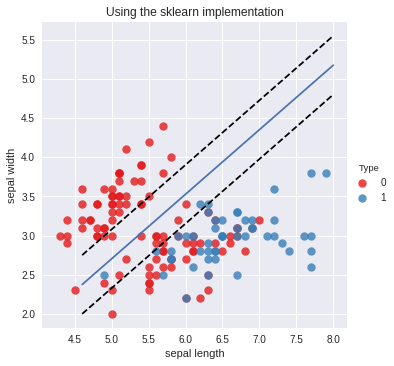

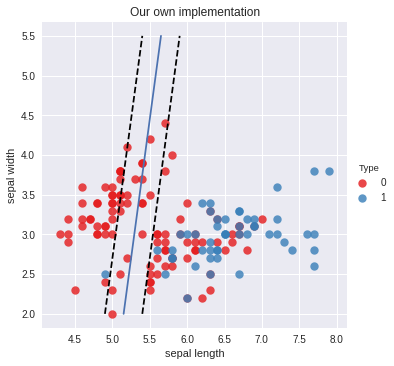

In [52]:
df.columns = ['length','width','Type']

# Look at the margins and support vectors
sns.lmplot('length', 'width', data=df, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');
plt.plot(xx1,yy1)
plt.plot(X1,y1,'k--')
plt.plot(x2,y2,'k--')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title("Using the sklearn implementation")
plt.show()
# Look at the margins and support vectors
sns.lmplot('length', 'width', data=df, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.scatter(beta_vals.support_vectors_[:, 0], beta_vals.support_vectors_[:, 1],
            s=80, facecolors='none');
plt.plot(dx1,dy1,'k--')
plt.plot(dx2,dy1,'k--')
plt.plot(dx3,dy3)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title("Our own implementation")
plt.show()


In [0]:
## ANS 4

In [55]:
df

,length,width,Type
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
5,5.4,3.9,0
6,4.6,3.4,0
7,5.0,3.4,0
8,4.4,2.9,0
9,4.9,3.1,0


In [0]:
df3 = df.head(150)
df2 = df
temp2=df3.iloc[:,-1]
temp2=temp2[:]

(900, 2)
(900,)


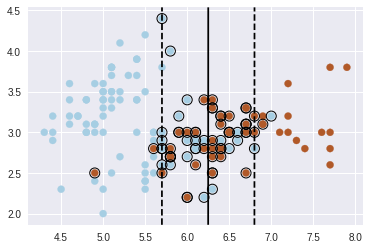

(900, 2)
(900,)


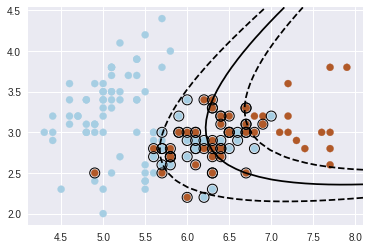

(900, 2)
(900,)


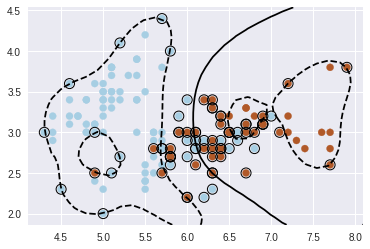

In [59]:
for kernel in ('linear', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma=2)
    clf.fit(df3.iloc[:,:2],df3.iloc[:,-1])
    plt.scatter(df3.iloc[:, 0], df3.iloc[:, 1], c=temp2, s=50, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    print(xy.shape)
    Z = clf.decision_function(xy)
    print(Z.shape)
    Z=Z.reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=1,
              linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
              linewidth=1, facecolors='none', edgecolors='k')
    plt.show()


(900, 2)
(900,)


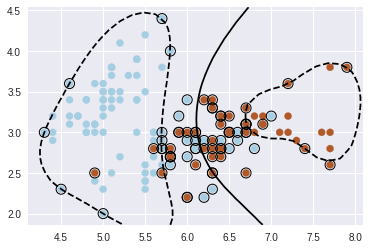

(900, 2)
(900,)


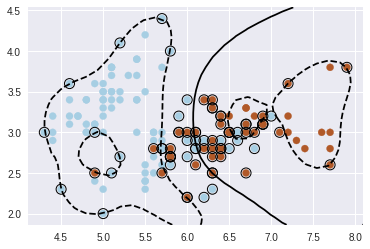

(900, 2)
(900,)


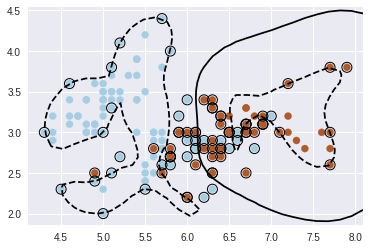

In [62]:
for g in [1,2,3]:
    clf = svm.SVC(kernel='rbf', gamma=g)
    clf.fit(df3.iloc[:,:2],df3.iloc[:,-1])
    plt.scatter(df3.iloc[:, 0], df3.iloc[:, 1], c=temp2, s=50, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    print(xy.shape)
    Z = clf.decision_function(xy)
    print(Z.shape)
    Z=Z.reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=1,
              linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
              linewidth=1, facecolors='none', edgecolors='k')
    plt.show()